In [1]:
from nilearn.plotting import plot_glass_brain
import nilearn.plotting
import glob
import nibabel as nib
from nilearn.image import mean_img
import nilearn.plotting as plotting

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


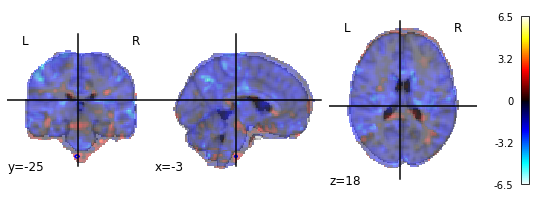

In [4]:
fig = nilearn.plotting.plot_stat_map('/home/oad4/scratch60/kpe_work/2nd_level/_cope_1/randomize/randomise_tstat1.nii.gz', alpha=0.5 )#, cut_coords=(0, 45, -7))
fig.add_contours('/home/oad4/scratch60/kpe_work/2nd_level/_cope_1/randomize/randomise_tfce_corrp_tstat1.nii.gz', levels=[0.95], colors='b')
,colorbar=True, threshold=2.2, display_mode='lyrz', black_bg=True)#, vmax=10);   

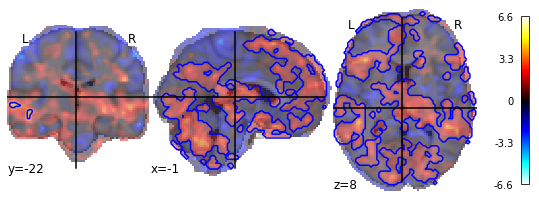

In [6]:
fig = nilearn.plotting.plot_stat_map('/home/oad4/scratch60/kpe_work/2nd_level/_cope_2/randomize/randomise_tstat1.nii.gz', alpha=0.5 )#, cut_coords=(0, 45, -7))
fig.add_contours('/home/oad4/scratch60/kpe_work/2nd_level/_cope_2/randomize/randomise_tfce_corrp_tstat1.nii.gz', levels=[0.95], colors='b')
,colorbar=True, threshold=3, display_mode='lyrz', black_bg=True)#, vmax=10);   

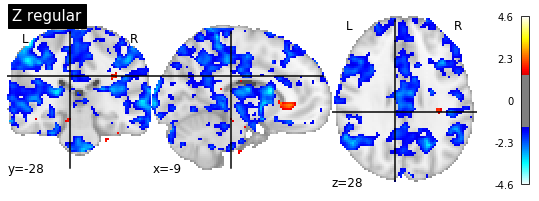

In [8]:
cope1_z = '/home/oad4/scratch60/kpe_work/2nd_level/_cope_1/flameo_ols/stats/zstat1.nii.gz'

nilearn.plotting.plot_stat_map(cope1_z, display_mode='ortho',
                              threshold=1.5, title = "Z regular")


In [2]:
mask_imgs = glob.glob('/home/oad4/scratch60/kpe_fsl/derivatives/fmriprep/sub-*/ses-1/func/sub-*_ses-1_task-Memory_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz')
len(mask_imgs)

21

In [3]:
mask_mean = mean_img(mask_imgs)

In [12]:
# visualize results
t_plot = nib.load('/home/oad4/scratch60/kpe_work/2nd_level/_cope_2/randomize/randomise_tstat1.nii.gz')
p = nib.load('/home/oad4/scratch60/kpe_work/2nd_level/_cope_2/randomize/randomise_tfce_corrp_tstat1.nii.gz')
# suggested threshold should be a=0.005 / .001

thr = 0.95
t_plot_data = t_plot.get_data()
p_data = p.get_data()

# threshold raw t map by p values
p_mask = p_data < thr
t_plot_data[p_mask] = 0

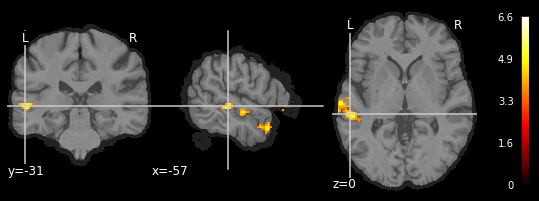

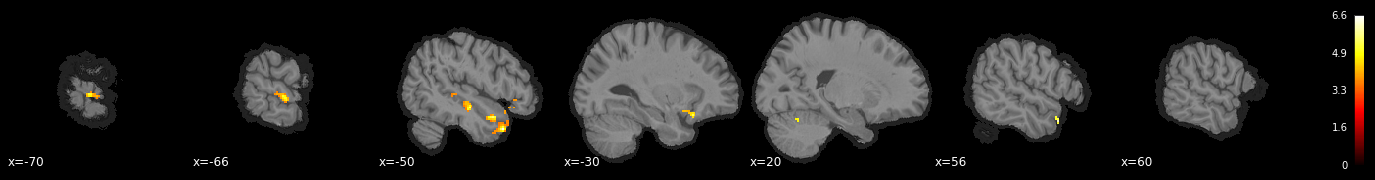

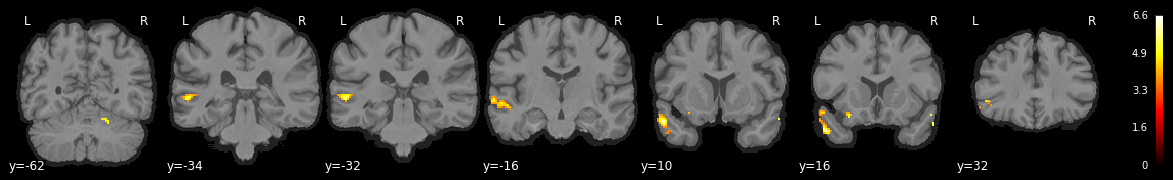

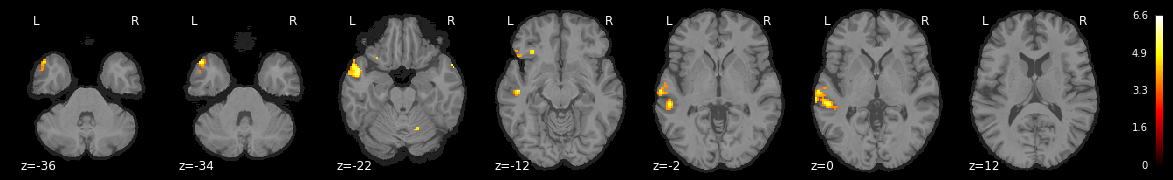

In [13]:
anat_mean = '/home/oad4/scratch60/kpe_fsl/derivatives/fmriprep/sub-1322/anat/sub-1322_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean)

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean,
                       display_mode="x", 
                       colorbar=True)

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean,
                       display_mode="y",
                       colorbar=True)

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean,
                       display_mode="z",
                       colorbar=True)